# Line Source Examples

**Scott Prahl**

**Oct 2023**

We use Green's function solutions for heat transfer due to an x-line
source in a semi-infinite medium, encapsulated within the `Line` class. The solutions are
based on the mathematical formulations provided in Carslaw and Jaeger's work.

The `Line` class represents a linear heat source that extends along all x-values passing 
through coordinates (yp, zp) in the medium. The medium's surface is defined by z=0. The 
class provides methods to calculate the temperature rise at any position (y, z) at a 
specified time `t`, due to different types of heat source behaviors.

Three types of line source behaviors are supported:

- `instantaneous()`: Represents a single, instantaneous release of heat along the x-line at time `tp`.

- `continuous()`: Represents a continuous release of heat along the x-line starting at t=0

- `pulsed()`: Represents a pulsed release of heat along the x-line for t=0 to `t_pulse`.

Each of these line sources can be analyzed under different boundary conditions at z=0:

- `'infinite'`: No boundary (infinite medium).

- `'adiabatic'`: No heat flow across the boundary.

- `'zero'`: Boundary is fixed at T=0.

In [1]:
import grheat
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Instantaneous 1 J/mm line source located a depth of 1mm

### No boundary (infinite medium)

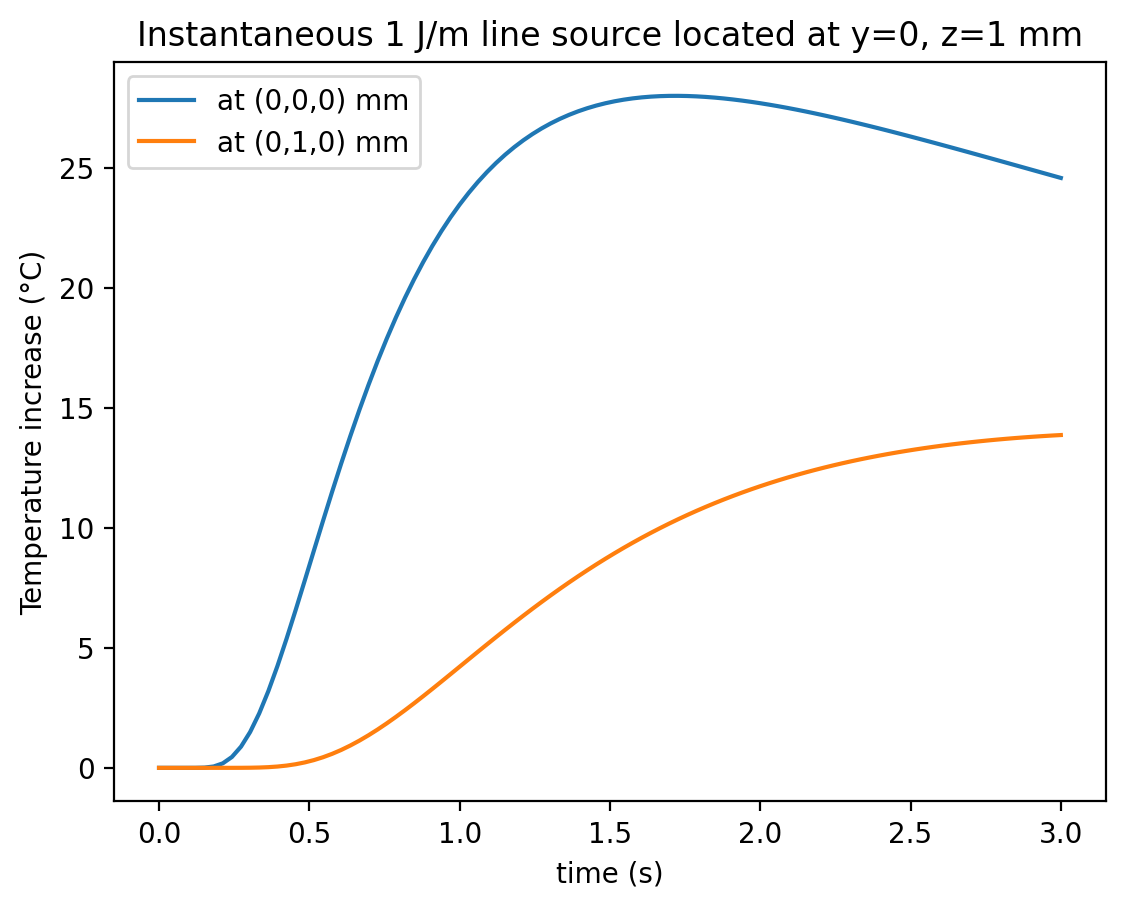

In [2]:
yp, zp = 0, 0.001        # meters
tp = 0                   # seconds impulse time
t = np.linspace(0,3,100) # seconds

line = grheat.Line(yp, zp, tp)

T = line.instantaneous(0,0,t) * 1000
plt.plot(t,T, label='at (0,0,0) mm')

T = line.instantaneous(0.001,0,t) * 1000
plt.plot(t,T, label='at (0,1,0) mm')

plt.legend()
plt.xlabel("time (s)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/m line source located at y=0, z=1 mm")
plt.show()

### Continuous flow across boundary

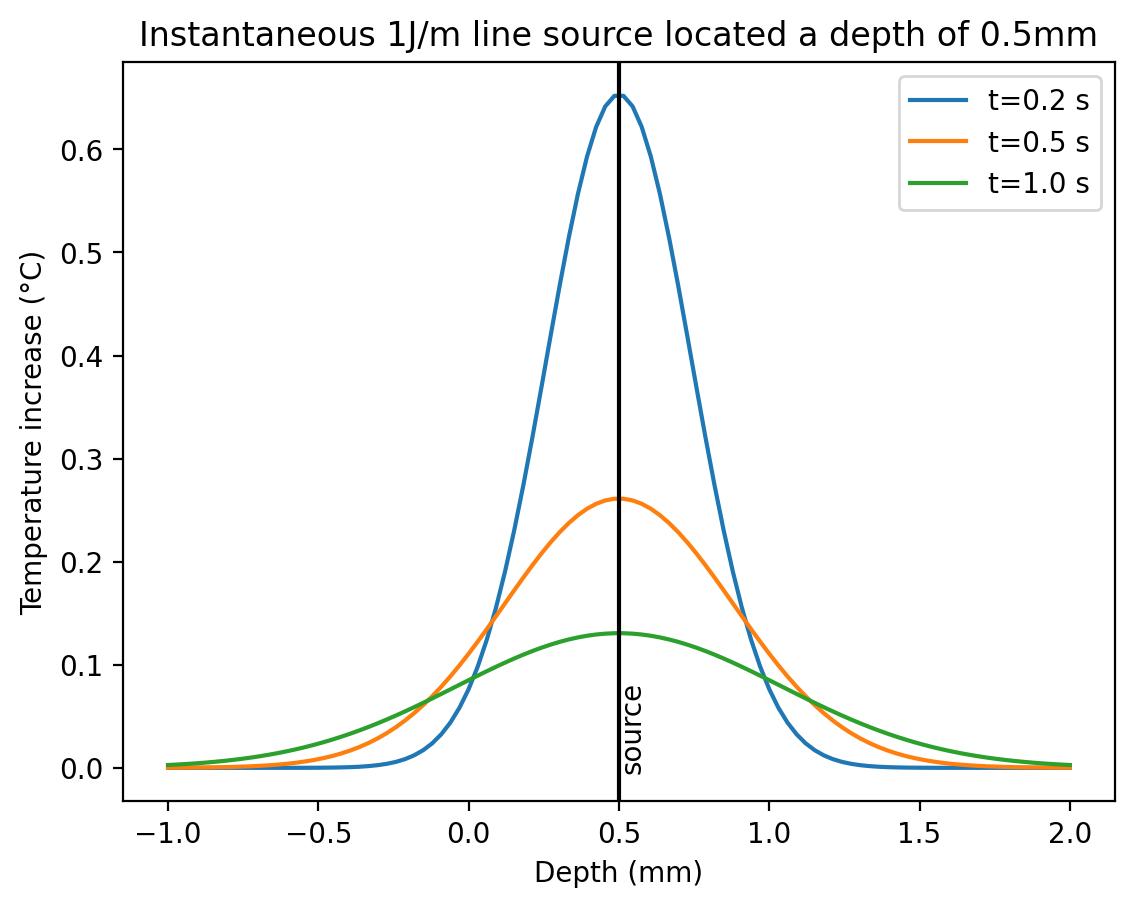

In [3]:
tp = 0                       # seconds impulse time
t = np.linspace(0,3,100)     # seconds
yp, zp = 0, 0.0005     # meters
z = np.linspace(-0.001,0.002,100) # meters

line = grheat.Line(yp, zp, tp)

for t in [0.2, 0.5, 1.0]:
    T = line.instantaneous(0,z,t)
    plt.plot(z*1000,T, label='t=%.1f s'%t)
    
plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1J/m line source located a depth of %.1fmm"%(zp*1000))
plt.legend()
plt.show()

### Showing adiabatic boundary condition

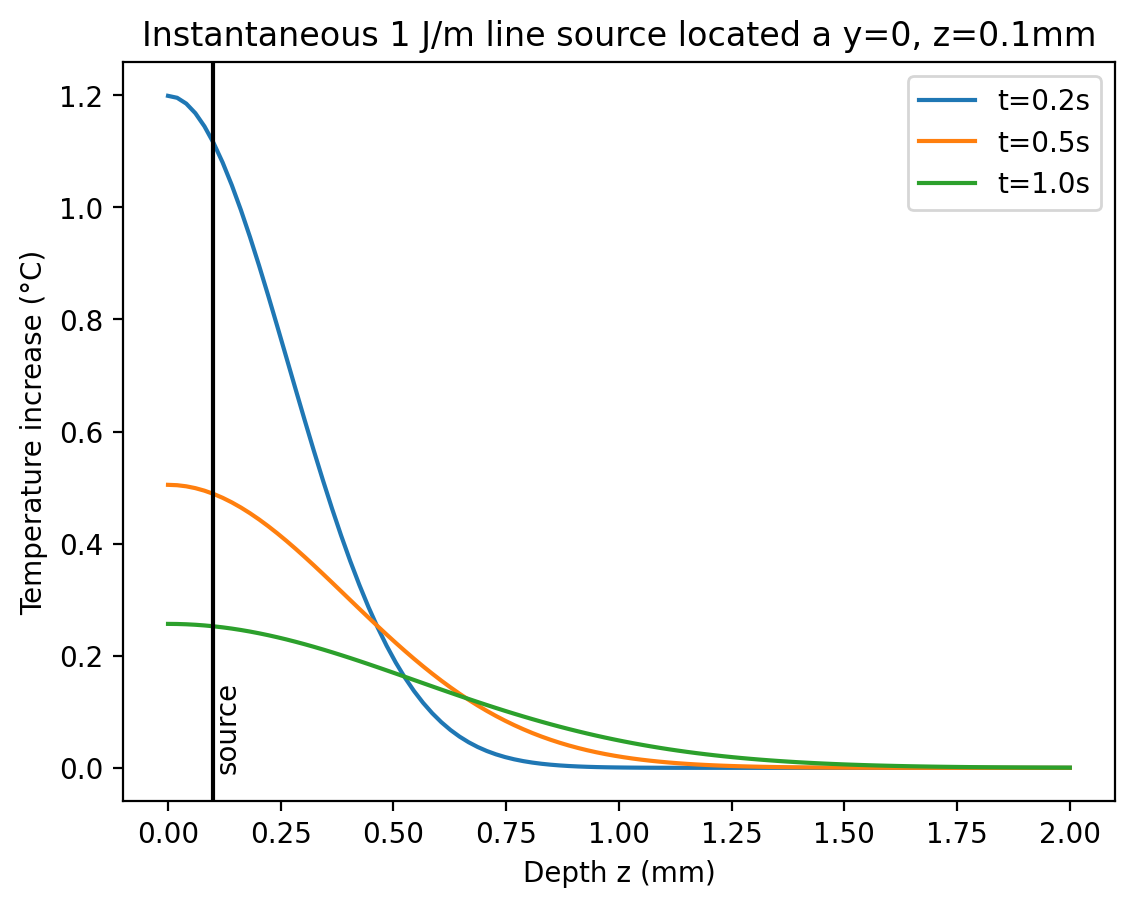

In [4]:
tp = 0                            # seconds impulse time
t = np.linspace(0,3,100)          # seconds
yp, zp = 0, 0.0001         # meters
z = np.linspace(0,0.002,100)      # meters

line = grheat.Line(yp, zp, tp, boundary='adiabatic')

for t in [0.2, 0.5, 1.0]:
    T = line.instantaneous(0,z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)

plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0, 'source', rotation=90)

plt.xlabel("Depth z (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/m line source located a y=0, z=%.1fmm"%(zp*1000))
plt.legend()
plt.show()

### Showing zero boundary condition

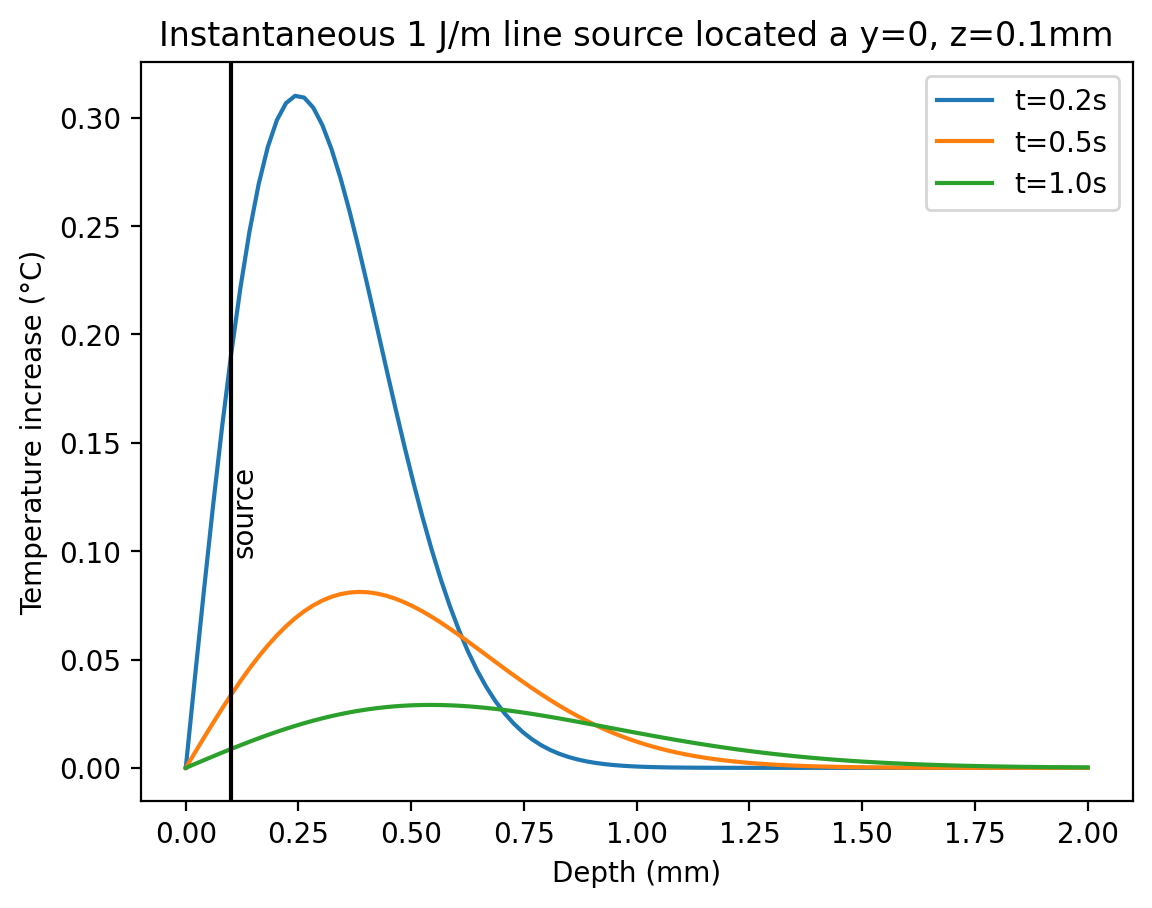

In [5]:
tp = 0                       # seconds impulse time
t = np.linspace(0,3,100)     # seconds
yp, zp = 0, 0.0001     # meters
z = np.linspace(0,0.002,100) # meters

line = grheat.Line(yp, zp, tp, boundary='zero')

for t in [0.2, 0.5, 1.0]:
    T = line.instantaneous(0,z,t)
    plt.plot(z*1000,T, label='t=%.1fs'%t)
    
plt.axvline(zp*1000, color='black')
plt.text(zp*1000, 0.10, 'source', rotation=90)

plt.xlabel("Depth (mm)")
plt.ylabel('Temperature increase (°C)')
plt.title("Instantaneous 1 J/m line source located a y=0, z=%.1fmm"%(zp*1000))
plt.legend()
plt.show()

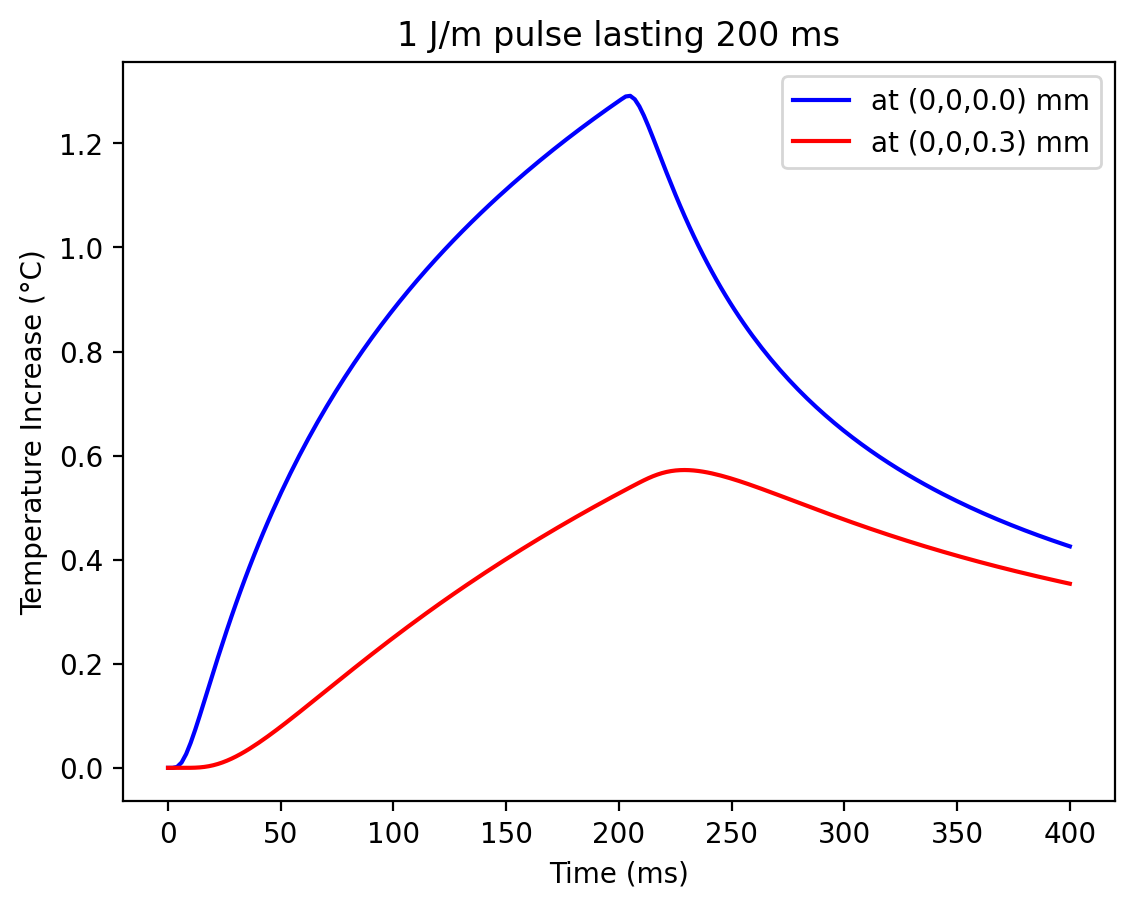

In [6]:
yp, zp = 0, 0.0001         # m
line = grheat.Line(yp,zp)

t_pulse = 0.200                        # seconds
t = np.linspace(0, 2*t_pulse, 200)     # seconds

y, z = 0, 0                      # meters
T = line.pulsed(y, z, t, t_pulse)   # 1 J/m

plt.plot(t * 1000, T, color='blue', label="at (0,0,%.1f) mm"%(1000*z))

y, z = 0, 0.0003                 # meters
T = line.pulsed(y, z, t, t_pulse)  # 1 J/m

plt.plot(t * 1000, T, color='red', label="at (0,0,%.1f) mm"%(1000*z))

plt.xlabel("Time (ms)")
plt.ylabel("Temperature Increase (°C)")
plt.title("1 J/m pulse lasting %.0f ms" % (t_pulse * 1000))
plt.legend()
plt.show()